# Technique 2 --> Random Sample Imputation

It assumes that data are missing completely at Random (MCAR).


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("E:\\100DaysDataScience\\datasets\\titanic_train.csv", usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()   #check null values

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()*100     #percentage of null values

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
df['Age'].dropna().sample()
#this will replace NA with randomvalue
#but this will replace only one value ....we need 
#177 values to replace

218    32.0
Name: Age, dtype: float64

In [7]:
#for this we can use
"""This will replace all the 177 values with random values"""
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)



423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [9]:
def impute_nan(df, variable, median):
    """fill the nan values with median"""
    
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df['Age'].isnull().sum(), random_state=0)
    
    #pandas need to have some index in order to merge the data set
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

### Description of impute_nan

`line 3` --> new feature is created and all nan will replace to median.

`line 5` --> create another feature and it will copy the data to "_random".

`line 7` --> pick all the null value index and put some random dat in it.

` line 10` --> we have to match both index so random feature should be back to feature. 

`line 11` --> it will replace all the missing value with random values of median

In [10]:
median = df.Age.median()

In [11]:
median

28.0

In [12]:
impute_nan(df, 'Age', median)

In [13]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [14]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

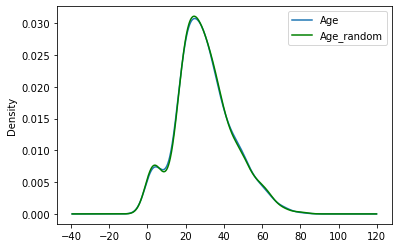

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind = 'kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

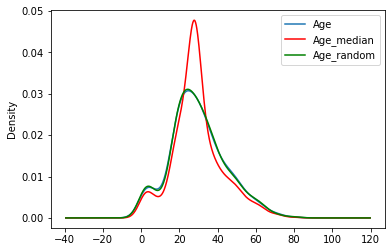

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind = 'kde', ax=ax, color='red')
df.Age_random.plot(kind = 'kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages/Disadvantages 

##### 1. Advantages

``--> Easy to Implement``

``--> Less Distortion in variance``

##### 2. DisAdvantages

``--> Easy situation randomness won't work``
